

# Project: Investigate a Dataset (NoShow Appointment Dataset!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# Describing the dataset
The dataset is collected from over 100,000 medical appointments in Brazil. Also this dataset shows whether not patients show up for their appointment or not using column(No-Show: Yes for cancelling and No for attending). Other  characteristics of this dataset are shown in each row uder columns named:
-  ‘ScheduledDay’ which tell what day the patients scheduled their appointment.
-  ‘Scholarship’ indicates if the patient is enrolled in Brasilian insurance program.
-  ‘Handcap’, and other three diaseas wgicg indicates if the patient is sick with any those diaseas.
-  ‘No_show’, No’ if the patients showed up to their appointment, and ‘Yes’ if they did not.



# Introducation
- there are multiple questions that I am trying to answer through my analysis such as:
 - Which factor affects the no show variable the most?
 - Is the Age affects the no show variable?
 - Is the Waiting days affects the no show variable?
 - Is the day of the week affects the no show variable ?
 - Is the Gender affects the no show variable ?
 - Is recieving SMS messages affect the no show variable ?
 - Is being included in Scholarship/Insurance affects the no show variable ?
 - Is the diseases affect the no show variable?


In [246]:
#import Python libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



In [247]:
# Loading data and printing few rows. 
df_noshow = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df_noshow.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [248]:
#checking table/data structure 
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [249]:
#checking number of rows and columns
df_noshow.shape

(110527, 14)

In [250]:
df_noshow.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [251]:
#check for any duplicatd values
df_noshow.duplicated().sum()

0

In [252]:
#check for any duplicatd values of appointment IDs
df_noshow.AppointmentID.duplicated().sum()

0

In [253]:
#check for any duplicatd values of Patients IDs
df_noshow.PatientId.duplicated().sum()

48228

In [254]:
#check for any null values
df_noshow.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [255]:
#to check the unique values of each column in our dataset
print(df_noshow.Gender.unique())
print(sorted(df_noshow.Age.unique()))
print(sorted(df_noshow.Neighbourhood.unique()))
print(df_noshow.Scholarship.unique())
print(df_noshow.Hipertension.unique())
print(df_noshow.Diabetes.unique())
print(df_noshow.Alcoholism.unique())
print(df_noshow.Handcap.unique())
print(df_noshow.SMS_received.unique())
print(df_noshow['No-show'].unique())

['F' 'M']
[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI', 'ILHA DO FRADE', 'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRINDADE', 'INHANGUETÁ', 'ITARARÉ', 'JABOUR', 'J



### Data Cleaning (NoShow Appointment!)

- I found that there is no missing data nor dulplicated data even the patients ID has duplicatied Id but with totally different Appointement Id 
- for each appointement which means it is not as it a new appointment for the same patient 

- Change ScheduledDay and AppointmentDay to be a date/datetime type
- Change PaientId to be string in order not to appear in the numerical analysis/ or wIi can just drop it 
- AppointmentID to be dropped because it isn't useful in the analysis

- Handcap column represents the number of patient disabilities, I will change it to indicate only if the patient is handcaped or not
- Age column has weired values of -1 and 0 which must be removed
- Add a new column for the weekday name to analysis what date of the week affects/causes the no show variable 
- Add a new column to  of the waiting days that the patients have to wait before coming to the hospital

In [256]:
# dropping the Appointment Id column
df_noshow.drop(['AppointmentID'], axis=1, inplace=True)
df_noshow.columns

Index(['PatientId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [257]:
# changing  PatientId type to be string
df_noshow.PatientId = df_noshow.PatientId.astype(str)

In [258]:
# changing the data type of ScheduledDay & AppointmentDay to be datetime
df_noshow.ScheduledDay = df_noshow.ScheduledDay.apply(np.datetime64)
df_noshow.AppointmentDay = df_noshow.AppointmentDay.apply(np.datetime64)

In [259]:
df_noshow.head(6)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296.0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,95985133231274.0,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No


In [260]:
# checking the changes
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  object        
 1   Gender          110527 non-null  object        
 2   ScheduledDay    110527 non-null  datetime64[ns]
 3   AppointmentDay  110527 non-null  datetime64[ns]
 4   Age             110527 non-null  int64         
 5   Neighbourhood   110527 non-null  object        
 6   Scholarship     110527 non-null  int64         
 7   Hipertension    110527 non-null  int64         
 8   Diabetes        110527 non-null  int64         
 9   Alcoholism      110527 non-null  int64         
 10  Handcap         110527 non-null  int64         
 11  SMS_received    110527 non-null  int64         
 12  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), int64(7), object(4)
memory usage: 11.0+ MB


In [261]:
#add a new column for the day name of the week using appointment day
df_noshow['DayName'] = df_noshow['AppointmentDay'].dt.day_name()
df_noshow.head(1)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DayName
0,29872499824296.0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday


In [262]:
# removing Age values that equals to or less Zero
df_noshow = df_noshow.query('Age > 0')
print(sorted(df_noshow.Age.unique()))  

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


In [263]:
# change the values of handcaped to be either 0 or 1 to indicate if the patient is handcaped or not 
df_noshow['Handcap'] = df_noshow['Handcap'].replace([2,3,4],1)
df_noshow.Handcap.unique()

array([0, 1])

In [264]:
# adding new column (Number_of_Waiting_Days) to check waiting days proir the appointment
df_noshow["Number_of_Waiting_Days"] = df_noshow.AppointmentDay - df_noshow.ScheduledDay
df_noshow["Number_of_Waiting_Days"] = df_noshow["Number_of_Waiting_Days"].abs().dt.days
df_noshow['Number_of_Waiting_Days'].head(7)

0    0
1    0
2    0
3    0
4    0
5    1
6    1
Name: Number_of_Waiting_Days, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Which factor affects the no show variable the most?)

In [265]:
# check the statics of the dataset
df_noshow.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Number_of_Waiting_Days
count,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,38.316085,0.101031,0.203772,0.074243,0.031406,0.020937,0.323264,9.514231
std,22.466214,0.301371,0.402804,0.262167,0.174412,0.143175,0.467725,15.037795
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,178.000000


-  On average, the age of the most patients is around 38 years old
-  Only an average of 10% of the patients are covered with the scholarship insurance
-  There is about 205 on average of the patients who suffer of Hyper Tension while there is an average of 7% who suffer diabetes and 3% who suffer alcoholism 
- Moreover, there is an average of 2% of the patients who are handcaped
- There is an average of 32% of the patients received a sms message
- Also, the average of waiting days is 9.5 days and the maximm number of days to wait is 178 day which is actually too far.


In [266]:
# cancellation rate
def no_show_rate(Var):
    no_show_count= Var.value_counts()
    print(no_show_count)
    no_show_rate = no_show_count['Yes']/no_show_count.sum() * 100
    print("Rate of people who miss their appointments:",no_show_rate, '%')
    

In [267]:
no_show_rate(df_noshow["No-show"])

No     85307
Yes    21680
Name: No-show, dtype: int64
Rate of people who miss their appointments: 20.26414424182377 %


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121f7a760>,
      dtype=object)

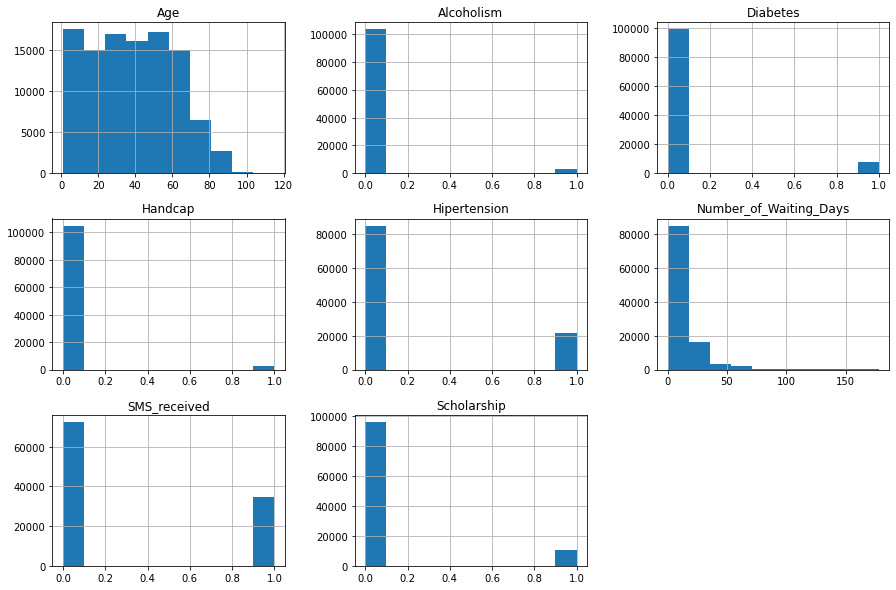

In [268]:
#Checking the different variables to evaluate which one is the most one that affacts the no show variable .
df_noshow.hist(figsize=(15, 10))

* Most of the paients age is below 60 years old. Also, Most of them don't suffer any of those variables so what affects it the most. I will keep digging

### Research Question 2  (Is the Age affects the no show variable ?!)

In [269]:
#ploting Age using a histogram chart 
def plot_histo(dataframe,Var, binsize):
    
    plt.hist(x= dataframe[Var], bins= binsize)
    index_no = dataframe.columns.get_loc(Var) 
    #print(index_no)
    #print(dataframe.columns[index_no])
    plt.title(dataframe.columns[index_no] + ' distribution')
    plt.xlabel(dataframe.columns[index_no])
    plt.ylabel('No Show')
    plt.show()

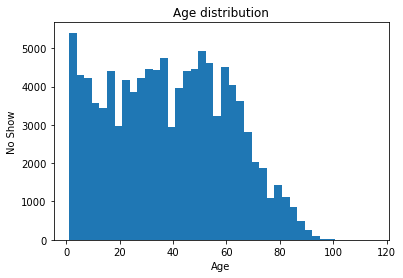

In [270]:
plot_histo(df_noshow,'Age',40)

In [271]:
def plot_sb(dataframe,Var1,Var2,color):
    

    index_no = dataframe.columns.get_loc(Var1)
    index_no2 = dataframe.columns.get_loc(Var2) 

    #print(index_no)
    #print(index_no2)
    #print(dataframe.columns[index_no])
    #print(dataframe.columns[index_no2])
    sns.countplot(data= dataframe,x = Var1,hue=Var2, orient='h', palette = color).set(title=dataframe.columns[index_no]
                                                                                 +' distribution')

    plt.show()


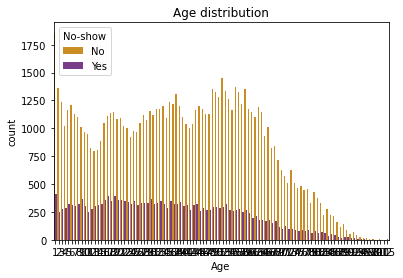

In [272]:
plot_sb(df_noshow,'Age','No-show', 'CMRmap_r')

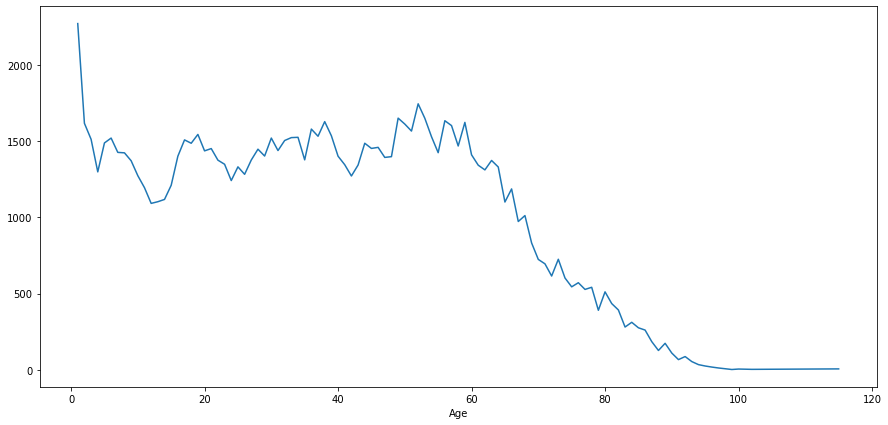

In [273]:
fig, ax = plt.subplots(figsize=(15,7))
df_noshow.groupby('Age').count()['No-show'].plot(ax=ax)

- Based on the last three diagrams, there is a relation between age and the no show as the age goes up, the no show goes down. Therefore, The lower age the higher cancellation rate.

### Research Question 3  (Is the Waiting days affects the no show variable ?)

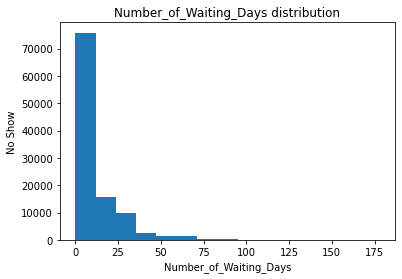

In [274]:
#ploting Age using a histogram chart 
plot_histo(df_noshow,'Number_of_Waiting_Days', 15)

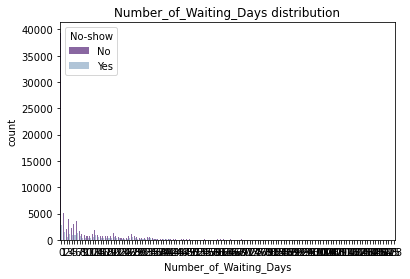

In [275]:
plot_sb(df_noshow,'Number_of_Waiting_Days','No-show','BuPu_r')
#sns.countplot(data=df_noshow,x='Number_of_Waiting_Days',hue='No-show')


- The diagram of the waiting days is not efficient. I will make it in groups 

In [276]:
# creating Categories to group the waiting days.
categories = pd.Series(['Same Day: 0', 'Week: 1-7', 'Month: 8-30', 
                        'Quarter: 31-90',  'a lot of time: >90'])
df_noshow['categories_of_waiting_days'] = pd.cut(df_noshow.Number_of_Waiting_Days, 
                                       bins = [-1, 0, 7, 30, 90, 180], labels=categories)

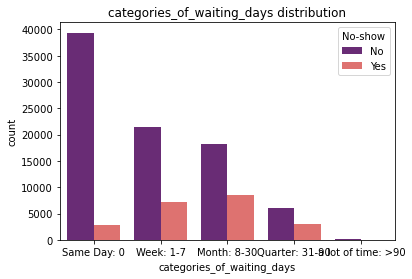

In [277]:
# plotting the waiting days
plot_sb(df_noshow, 'categories_of_waiting_days','No-show','magma')
#sns.countplot(x = 'categories_of_waiting_days', hue = 'No-show', data = df_noshow, palette = 'magma')


- It appears that there is a relation between the waiting days and the no show because the increase in the number of the waiting days did affect the cancellation. The less days of wait, the less cancellation of appointments.

### Research Question 4  (Is the day of the week affects the no show variable ?!)

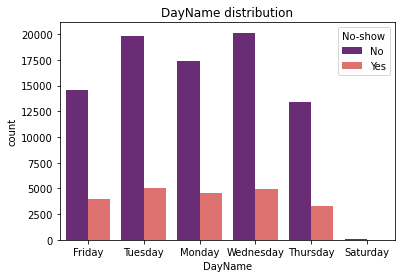

In [235]:
#plotting Days names
plot_sb(df_noshow, 'DayName','No-show','magma')
#sns.countplot(x = 'DayName', hue = 'No-show', data = df_noshow, palette = 'magma')

- As shown, Tuesday and Wednesday are the hightest in cancellation and in attending with a huge gap between cancellation and showing up. The cancellation rate keeps growing through the week days and decreases by the weekends. 

### Research Question 5  (Is the Gender affects the no show variable ?!)

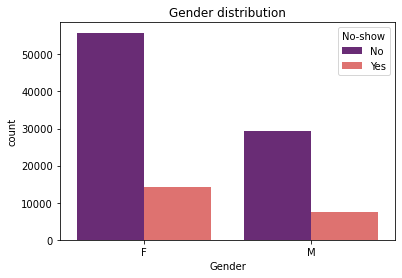

In [236]:
# checking the gender if there is any tendancy of it towards cancellation 
plot_sb(df_noshow, 'Gender','No-show','magma')
#sns.countplot(x = 'No-show', hue = 'Gender', data = df_noshow, palette = 'magma')


- The females tend to cancel more their appointements comparing to males and in the same time the showing up rate of the females still higher than males. but the question still there why females tend to cancel or to attend more than males. Also how a gender can affect cancellation rate?


### Research Question 6  (Is the SMS messages affect the no show variable ?)

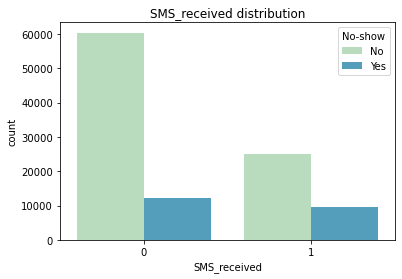

In [239]:
# checking if sending SMS affect the cancellation 
plot_sb(df_noshow, 'SMS_received','No-show','GnBu')

#sns.countplot(data=df_noshow,x='SMS_received',hue='No-show')

- People who didn't recieve any message tend to show for thier appointemnts more than who did. So, there is no relation that affects the cancellation. 
- comparing the poeple who didn't attend and recieved a sms to who didn't, I found it is less so I can't relate to SMS factor/variable

### Research Question 7  (Is having Scholarship/Insurance affects the no show variable ?)

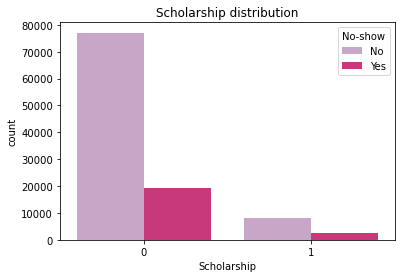

In [244]:
# checking if insurance affects the cancellation  
#sns.countplot(data=df_noshow,x='Scholarship',hue='No-show')
plot_sb(df_noshow, 'Scholarship','No-show','PuRd')


- People ,who are  not included in the insurance, tend to cancel thier appointments more than who are included and in the same time much more of them who don't have insurance, they go to thier appointments.  

### Research Question 8 (Is the diseases affect the no show variable ?)

In [36]:
# checking if any of the diaseas affect the cancellation 
hipertension = df_noshow.groupby(['No-show']).sum()['Hipertension']
diabetes = df_noshow.groupby(['No-show']).sum()['Diabetes']
alcoholism = df_noshow.groupby(['No-show']).sum()['Alcoholism']
handcaped = df_noshow.groupby(['No-show']).sum()['Handcap']
fig = plt.figure(figsize=(15,60)) 


<Figure size 1080x4320 with 0 Axes>

Text(0, 0.5, 'HyperTension')

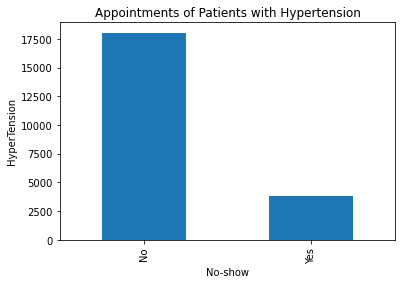

In [37]:
hipertension.plot.bar()
plt.title('Appointments of Patients with Hypertension')
plt.xlabel('No-show')
plt.ylabel('HyperTension')

- People with Hypertension don't cancel thier appointments. I think it is related to having a disease, people tend to take care of thier health and checking thier disease status. 

Text(0, 0.5, 'Diabetes')

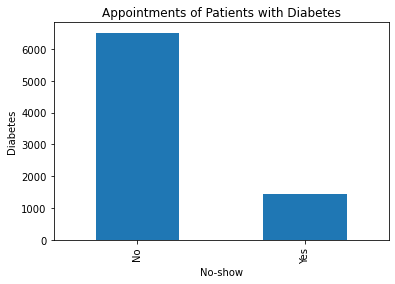

In [38]:
diabetes.plot.bar()
plt.title('Appointments of Patients with Diabetes')
plt.xlabel('No-show')
plt.ylabel('Diabetes')

- People with Diabetes don't cancel thier appointments. I think it is related to having a disease, people tend to take care of thier health and checking thier disease status. 

Text(0, 0.5, 'Alcoholism')

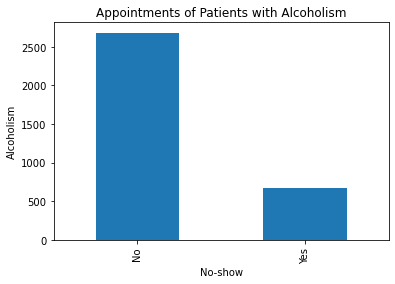

In [39]:
alcoholism.plot.bar()
plt.title('Appointments of Patients with Alcoholism')
plt.xlabel('No-show')
plt.ylabel('Alcoholism')

- People with Alcoholism don't cancel thier appointments. I think it is related to having a disease, people tend to take care of thier health and checking thier disease status. 

Text(0, 0.5, 'Handcaped')

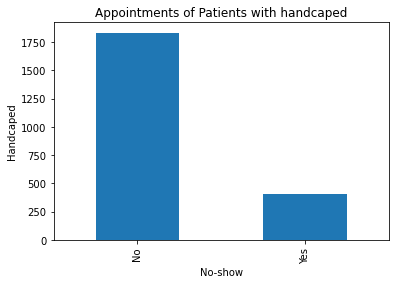

In [40]:
handcaped.plot.bar()
plt.title('Appointments of Patients with handcaped')
plt.xlabel('No-show')
plt.ylabel('Handcaped')

- People who is Handcaped don't cancel thier appointments. I think it is related to having a disease, people tend to take care of thier health and checking thier disease status. 

<a id='conclusions'></a>
## Conclusions

- I couldn't find a definite conclsuion of which variable affects cancelaltion the most and why people cancel their appointments but I found some insights:
- There is about 80% of people showed up for their appointments
- People under 40 years old tend to cancel more than who is older than 40's
- People with diaseas tend more to attend thier appointments 
- Females tend to cancel  more than males.
- Having insurance doesn't affect the cancellation rate.
- Tuesday and Wednesday have the hightest cancellation rate.

# Limitations:

- The analysis is limited to trends. Causations cannot be drawn. 
- No enough data about variables such as neighbourhood(locations not known) which don't allow in-depth analysis to give definite conclusion.
- weired values such as the negative value of the Age column


In [245]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'investigate-a-dataset-Dina-NoShow Appointments.ipynb'])

0